In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os

## Extracting Time Series

In [24]:
def fetch_stock_data(ticker, interval="1h", period="730d"):
    stock = yf.Ticker(ticker)
    data = stock.history(period=period, interval=interval)

    # Reset index to get Date as a column
    data.reset_index(inplace=True)

    # Select relevant columns (the other columns are zero)
    data = data[["Datetime", "Open", "High", "Low", "Close", "Volume"]]
    data.rename(columns={"Datetime": "Date"}, inplace=True)

    # Removing time-zone offset
    data["Date"] = pd.to_datetime(data["Date"]).dt.tz_localize(None)

    data["item_id"] = ticker

    return data

#--------#
ticker = "AAPL"
data = fetch_stock_data(ticker)

data

,Date,Open,High,Low,Close,Volume,item_id
0,2022-03-21 09:30:00,164.110001,165.589996,163.014999,163.225006,18295067,AAPL
1,2022-03-21 10:30:00,163.220001,166.160004,163.220001,166.039902,15152948,AAPL
2,2022-03-21 11:30:00,166.035004,166.350006,165.369995,165.615005,9968884,AAPL
3,2022-03-21 12:30:00,165.619995,165.645004,163.160004,163.685501,10156181,AAPL
4,2022-03-21 13:30:00,163.690002,164.789993,163.419998,164.679993,8501280,AAPL
...,...,...,...,...,...,...,...
5078,2025-02-13 15:30:00,241.544998,241.768997,241.009995,241.520004,4257382,AAPL
5079,2025-02-14 09:30:00,241.070007,245.050003,241.000000,244.380005,11287330,AAPL
5080,2025-02-14 10:30:00,244.380005,244.380005,243.160004,243.945007,4923936,AAPL
5081,2025-02-14 11:30:00,243.940002,244.529999,243.690002,243.815201,4178600,AAPL


### Saving the data

In [25]:
os.makedirs("../data/raw", exist_ok=True)
data.to_csv(f"../data/raw/{ticker}_data.csv", index=False)

print(f"✅ Data saved for {ticker}!")

✅ Data saved for AAPL!


### Plotting the data

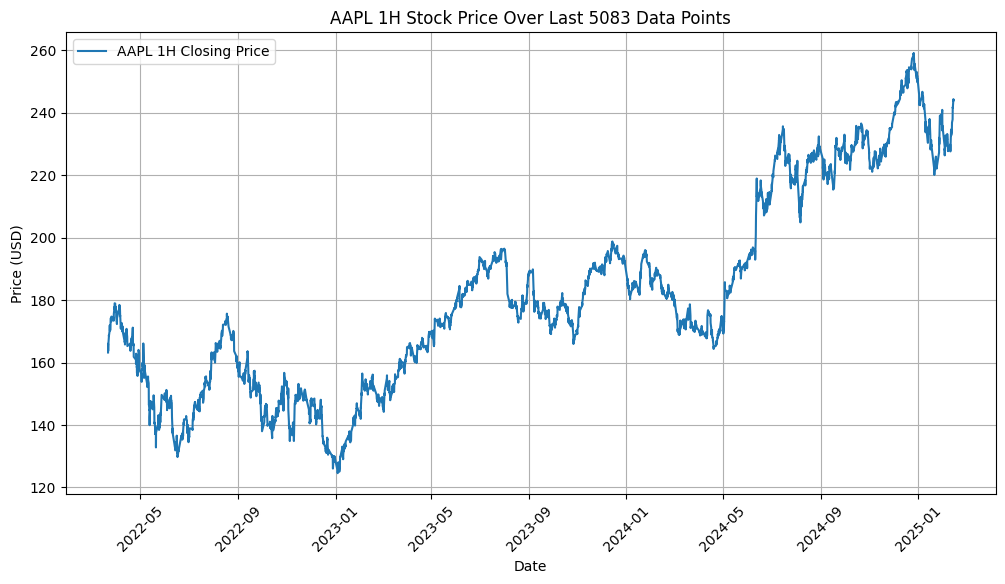

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Close"], label=f"{ticker} 1H Closing Price")
plt.title(f"{ticker} 1H Stock Price Over Last {data.shape[0]} Data Points")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()